In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/content/drive/MyDrive/data/train.csv")

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.shape

(1460, 81)

We have 80 independent features and 1460 rows

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#Exploratory Data Analysis

In [7]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

Listing all columns with missing values

In [8]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


Dropped columns with extremely high amount of NULL values

In [9]:
df = df.drop(["PoolQC","Fence","MiscFeature","FireplaceQu","Alley","Id"],axis =1)

In [10]:
df = df.dropna()

In [11]:
df.duplicated().values.any()

False

No duplicated records are found

Filling the missing values with median for Numerical features and highest mode for categorical features

In [12]:
from sklearn.impute import SimpleImputer

categorical_imputer = SimpleImputer(strategy='most_frequent')
numerical_imputer = SimpleImputer(strategy='median')

In [13]:
categorical_columns = df.select_dtypes(include='object').columns
numerical_columns = df.select_dtypes(exclude='object').columns

print("Categorical Columns:", categorical_columns)
print("Numerical Columns:", numerical_columns)

Categorical Columns: Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')
Numerical Columns: Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',

In [14]:
df[["MasVnrType","BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "Electrical", "GarageType", "GarageFinish", "GarageQual", "GarageCond"]] = categorical_imputer.fit_transform(df[["MasVnrType","BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "Electrical", "GarageType", "GarageFinish", "GarageQual", "GarageCond"]])
df[["LotFrontage", "MasVnrArea", "GarageYrBlt"]] = numerical_imputer.fit_transform(df[["LotFrontage", "MasVnrArea", "GarageYrBlt"]])

In [15]:
df.isna().sum().any()

False

In [16]:
# plt.figure(figsize=(30, 18))
# sns.heatmap(df.corr(numeric_only=True),annot=True)
# plt.show()

Listing correlation values with SalePrice in descending order

In [17]:
correlation_matrix = df.corr(numeric_only = True)

correlation_with_target = correlation_matrix['SalePrice'].sort_values(ascending=False)
print("Correlation with SalePrice:\n", correlation_with_target)

Correlation with SalePrice:
 SalePrice        1.000000
OverallQual      0.795437
GrLivArea        0.707481
GarageCars       0.652103
GarageArea       0.620772
TotalBsmtSF      0.617741
1stFlrSF         0.617692
FullBath         0.578299
TotRmsAbvGrd     0.560521
YearBuilt        0.523434
YearRemodAdd     0.519806
GarageYrBlt      0.502248
MasVnrArea       0.485409
Fireplaces       0.458182
BsmtFinSF1       0.378678
LotFrontage      0.343978
OpenPorchSF      0.338600
WoodDeckSF       0.330286
2ndFlrSF         0.302569
LotArea          0.302268
HalfBath         0.259469
BsmtFullBath     0.223948
BsmtUnfSF        0.191247
BedroomAbvGr     0.168489
ScreenPorch      0.106479
PoolArea         0.092085
MoSold           0.052584
3SsnPorch        0.033947
LowQualFinSF    -0.003541
YrSold          -0.006723
MiscVal         -0.036001
BsmtFinSF2      -0.036923
BsmtHalfBath    -0.041341
MSSubClass      -0.089478
KitchenAbvGr    -0.115382
OverallCond     -0.138511
EnclosedPorch   -0.161711
Name: Sal

Lets visualize variables with the most strong correlation

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'GarageYrBlt'],
      dtype='object')


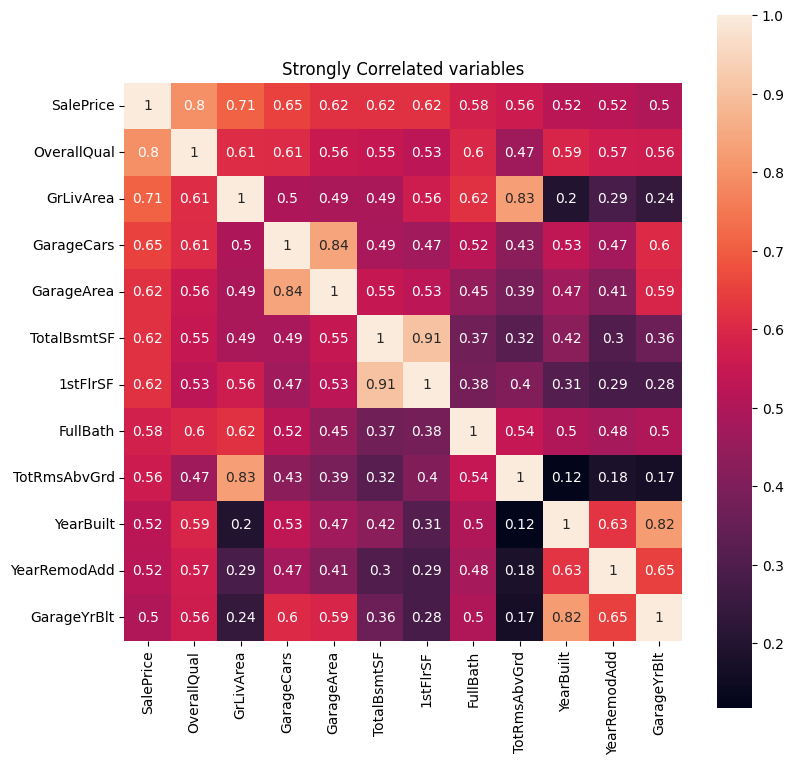

In [18]:
corr = df.corr(numeric_only = True)
highcor_var = corr.loc[corr.SalePrice.abs()>0.5].sort_values(by='SalePrice',ascending = False).index
highcor_data = df.loc[:,highcor_var]
fig,ax = plt.subplots(figsize = (9,9))
fig = sns.heatmap(highcor_data.corr(),annot = True,square = True)
plt.title('Strongly Correlated variables')
print(highcor_var)

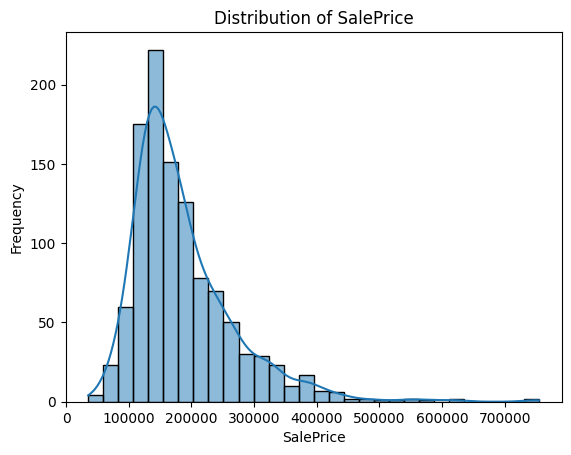

In [19]:
# Let's look at the Sale Price Distribution

sns.histplot(df['SalePrice'], bins=30, kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

We can see a great variations in house prices from the distribution

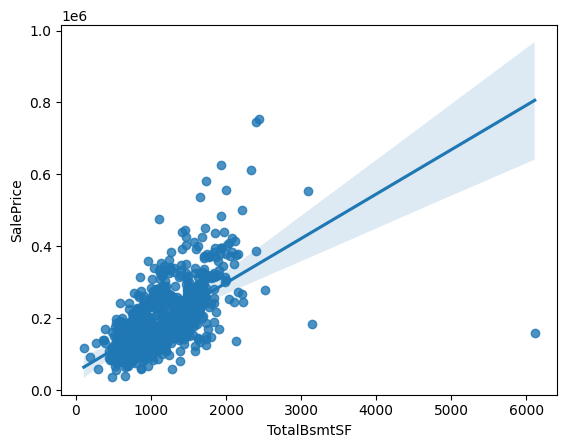

In [20]:
sns.regplot(x = 'TotalBsmtSF', y = 'SalePrice', data = df)
plt.show()

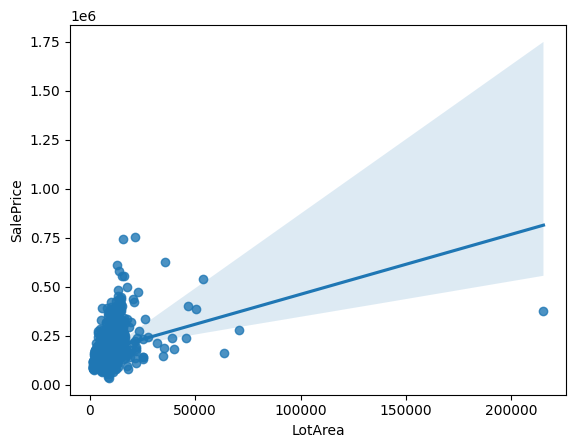

In [21]:
sns.regplot(x = 'LotArea', y = 'SalePrice', data = df)
plt.show()

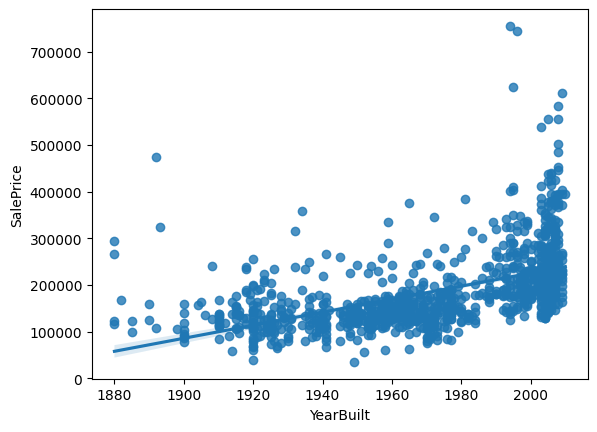

In [22]:
sns.regplot(x = 'YearBuilt', y = 'SalePrice', data = df)
plt.show()

So there is definitely linear relationship when observing relation between dependent and few independent variables

Text(0.5, 1.0, 'House price average in each zone')

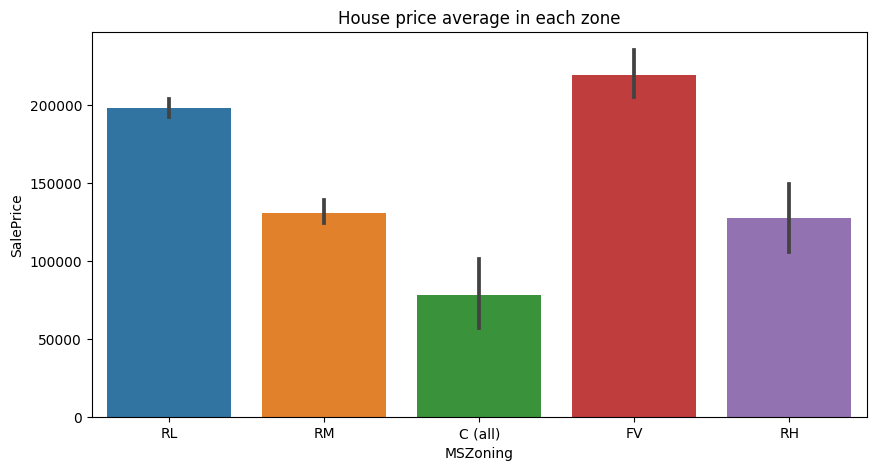

In [23]:
fig, ax1= plt.subplots(1, 1, figsize= (10, 5))
sns.barplot(data= df, x= 'MSZoning', y= "SalePrice")

plt.title("House price average in each zone")

Average house price is high in Floating Village Residential

Visualizing the Sale Price distribution in different Sale Condition and Sale type

Text(0.5, 1.0, 'SalePrice distribution per Sale Condition')

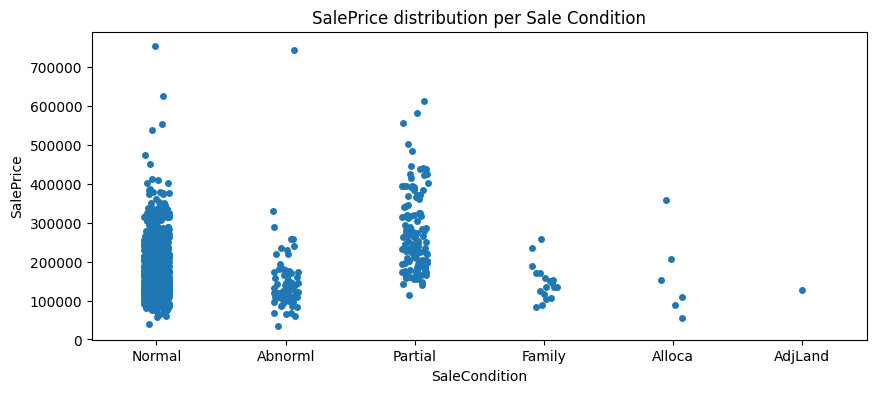

In [24]:
plt.figure(figsize= (10,4))
sns.stripplot(y= "SalePrice", x="SaleCondition", data= df)
plt.title( "SalePrice distribution per Sale Condition")

Text(0.5, 1.0, 'SalePrice distribution per Sale type')

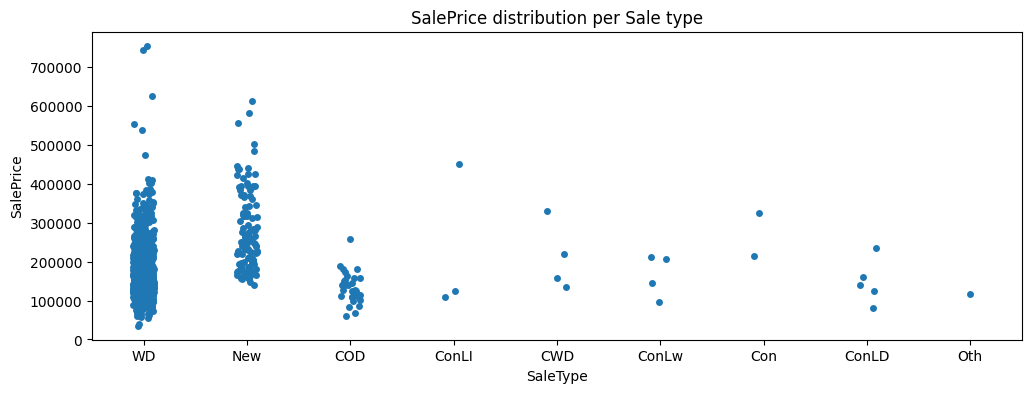

In [25]:
plt.figure(figsize= (12,4))
sns.stripplot(y= "SalePrice", x="SaleType", data= df)
plt.title( "SalePrice distribution per Sale type")

#Handling Outliers

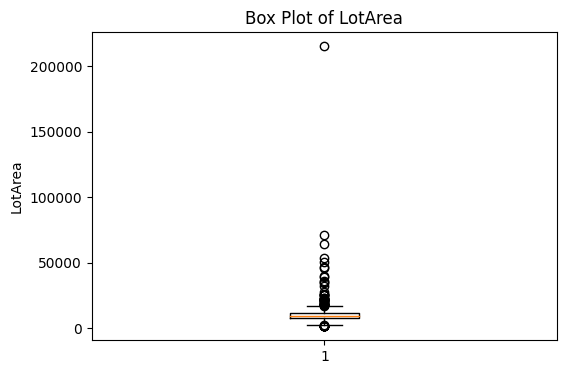

In [26]:
plt.figure(figsize=(6, 4))
plt.boxplot(df['LotArea'])
plt.ylabel('LotArea')
plt.title('Box Plot of LotArea')
plt.show()

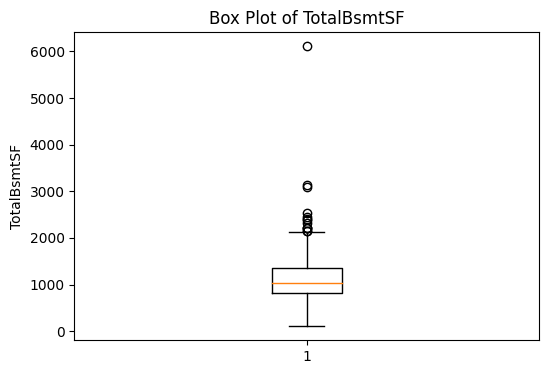

In [27]:
plt.figure(figsize=(6, 4))
plt.boxplot(df['TotalBsmtSF'])
plt.ylabel('TotalBsmtSF')
plt.title('Box Plot of TotalBsmtSF')
plt.show()

So we can see some outliers in this dataset by observing a few features

In [28]:
numerical_columns_names = df.select_dtypes(include=['int64', 'float64']).columns
numerical_columns = df[numerical_columns_names]

Using Z- Score for removing outliers

In [29]:
from scipy import stats

z_scores = np.abs(stats.zscore(numerical_columns))

threshold = 3

outliers = (z_scores > threshold).any(axis=1)

df = df[~outliers]
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
6,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,307000
10,20,RL,70.0,11200,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,129500


In [30]:
df.shape

(782, 75)

#Feature Engineering

In [31]:
#Here I calculated total bathromms in the basement
df_copy = df.copy()

df_copy['BsmtTotalBath'] = df_copy['BsmtFullBath'] + df_copy['BsmtHalfBath']

df_copy.drop(['BsmtFullBath', 'BsmtHalfBath'], axis=1, inplace=True)

df = df_copy.copy()

print(df['BsmtTotalBath'])

0       1
2       1
4       1
6       1
10      1
       ..
1451    0
1452    1
1454    1
1455    0
1456    1
Name: BsmtTotalBath, Length: 782, dtype: int64


In [32]:
#Here I calculated total bathrooms above grade

df['TotalBath'] = df['FullBath'] + df['HalfBath']

df.drop(['FullBath', 'HalfBath'], axis=1, inplace=True)

print(df['TotalBath'])

0       3
2       3
4       3
6       2
10      1
       ..
1451    2
1452    1
1454    2
1455    3
1456    2
Name: TotalBath, Length: 782, dtype: int64


In [33]:
# Here I am calculating age of the House.
#If year built and year remodelled is same, just taking one of them
#If the house has been remodelled taking the new remodelled date for calculating Age

current_year = 2023

df['Age'] = current_year - df['YearBuilt']

df['Age'] = df['Age'].where(df['YearBuilt'] == df['YearRemodAdd'], current_year - df['YearRemodAdd'])

df.drop(['YearBuilt', 'YearRemodAdd'], axis=1, inplace=True)

print(df['Age'])

0       20
2       21
4       23
6       18
10      58
        ..
1451    14
1452    18
1454    18
1455    23
1456    35
Name: Age, Length: 782, dtype: int64


In [34]:
#Here I calculated the porch quality by giving weights to each of them

df['PorchQuality'] = 2 * df['OpenPorchSF'] +  5 * df['EnclosedPorch'] +  4 * df['3SsnPorch'] + 3.5 * df['ScreenPorch']

df.drop(['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch'], axis=1, inplace=True)

print(df['PorchQuality'])

0       122.0
2        84.0
4       168.0
6       114.0
10        0.0
        ...  
1451     72.0
1452     56.0
1454    226.0
1455     80.0
1456      0.0
Name: PorchQuality, Length: 782, dtype: float64


In [35]:
#Calculating total Garage capacity by taking product of GarageCars and garageArea

df['TotalGarageSize'] = df['GarageCars'] * df['GarageArea']

df.drop(['GarageCars', 'GarageArea'], axis=1, inplace=True)

print(df['TotalGarageSize'])

0       1096
2       1216
4       2508
6       1272
10       384
        ... 
1451    2520
1452    1050
1454     800
1455     920
1456    1000
Name: TotalGarageSize, Length: 782, dtype: int64


In [36]:
Y = df["SalePrice"]
X = df.drop(["SalePrice"], axis =1)

In [37]:
print(Y)

0       208500
2       223500
4       250000
6       307000
10      129500
         ...  
1451    287090
1452    145000
1454    185000
1455    175000
1456    210000
Name: SalePrice, Length: 782, dtype: int64


In [38]:
# Droping Independent variables that are higly collinear with each other with a threshold of 0.8

corr = X.corr(numeric_only = True).abs()

mask = np.triu(np.ones_like(corr, dtype='bool'))

tri_df = corr.mask(mask)

to_drop = [c for c in tri_df.columns if any(tri_df[c] > 0.8)]
print(f" Dropping {len(to_drop)} features:", to_drop)

X = X.drop(to_drop, axis=1)

 Dropping 2 features: ['TotalBsmtSF', 'GrLivArea']


#Feature Transformation

In [39]:
categorical_features = X.select_dtypes(include='object').columns
numerical_features = X.select_dtypes(exclude='object').columns

In [40]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

num_pipeline = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]
)

cat_pipeline = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot_encoder', OneHotEncoder(handle_unknown = 'ignore'))
        #('onehot_encoder', OneHotEncoder())
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ('num_pipeline', num_pipeline, numerical_features),
        ('cat_pipeline', cat_pipeline, categorical_features)
    ]
)

In [41]:
X = preprocessor.fit_transform(X)

In [43]:
Y = np.log(Y)
print(Y)

0       12.247694
2       12.317167
4       12.429216
6       12.634603
10      11.771436
          ...    
1451    12.567551
1452    11.884489
1454    12.128111
1455    12.072541
1456    12.254863
Name: SalePrice, Length: 782, dtype: float64


In [44]:
X.shape

(782, 232)

In [45]:
Y.shape

(782,)

In [46]:
Y = Y.ravel()

#Train-Test Split

In [47]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

In [48]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(625, 232)
(625,)
(157, 232)
(157,)


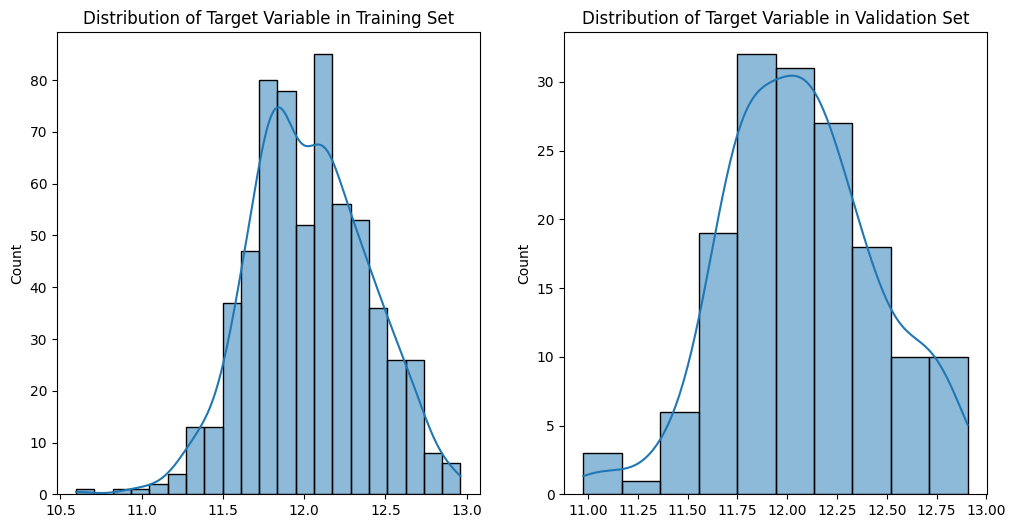

In [49]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.histplot(y_train, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Target Variable in Training Set')

sns.histplot(y_val, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Target Variable in Validation Set')

plt.show()

#Defining the evaluation metrics

In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(true, predicted)
    return mae, rmse, r2

#Model Training

In [128]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from xgboost import XGBRegressor

In [52]:
models = {
    "Linear Regression": LinearRegression(),
    "K-Neighbors Regressor": KNeighborsRegressor(n_neighbors = 5),
    "Random Forest Regressor": RandomForestRegressor(n_estimators = 500),
    "AdaBoost Regressor": AdaBoostRegressor(learning_rate = 0.04, n_estimators = 5000),
    "XGB Regressor": XGBRegressor(n_estimators= 6000, learning_rate = 0.01),
    "SVR": SVR(C = 0.5),
}

In [53]:
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train)

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_val)

    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_val, y_test_pred)


    print(list(models.keys())[i])
    print("\n")

    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')

Linear Regression


Model performance for Training set
- Root Mean Squared Error: 0.0744
- Mean Absolute Error: 0.0515
- R2 Score: 0.9580
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.1046
- Mean Absolute Error: 0.0744
- R2 Score: 0.9223


K-Neighbors Regressor


Model performance for Training set
- Root Mean Squared Error: 0.1166
- Mean Absolute Error: 0.0833
- R2 Score: 0.8969
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.1508
- Mean Absolute Error: 0.1096
- R2 Score: 0.8385


Random Forest Regressor


Model performance for Training set
- Root Mean Squared Error: 0.0509
- Mean Absolute Error: 0.0343
- R2 Score: 0.9804
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.1379
- Mean Absolute Error: 0.1013
- R2 Score: 0.8650


AdaBoost Regressor


Model performance for Training set
- Root Mean Squared Error: 0.1218
- Mean Absolute Error: 0.1015
- R

I will be using xgboost here since number of features is large in our case and xgboost are good at handling high-dimensional data

Also, I will use rmse for evaluation since it is easily interpretable to any nontechnical person and we have also already dealt with most outliers

In [151]:
XGB =  XGBRegressor(n_estimators= 8000,
    learning_rate = 0.01,
    )
XGB_regressor = XGB.fit(x_train, y_train)
y_pred = XGB_regressor.predict(x_val)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
print(f"Accuracy of the model is {rmse}")

Accuracy of the model is 0.13182214287215208


Text(0, 0.5, 'Predicted')

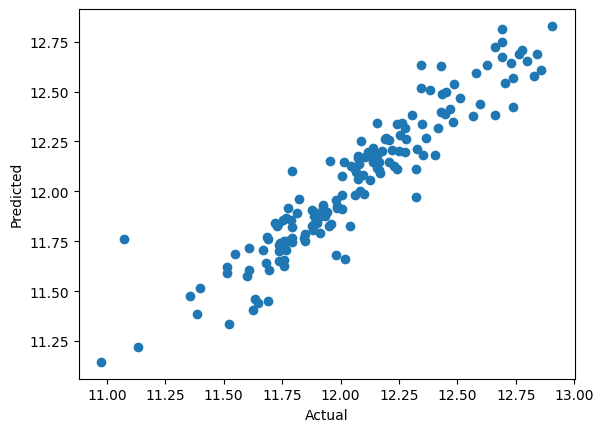

In [141]:
plt.scatter(y_val,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

#Prediction on Test Set

In [58]:
test_df = pd.read_csv("/content/drive/MyDrive/data/test.csv")

In [59]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [60]:
test_df.shape

(1459, 80)

In [61]:
test_df = test_df.drop(["PoolQC", "Fence", "MiscFeature", "FireplaceQu", "Alley", "Id", "TotalBsmtSF", "GrLivArea"],axis =1)

In [80]:
test_df['BsmtTotalBath'] = test_df['BsmtFullBath'] + test_df['BsmtHalfBath']
test_df.drop(['BsmtFullBath', 'BsmtHalfBath'], axis=1, inplace=True)

test_df['TotalBath'] = test_df['FullBath'] + test_df['HalfBath']
test_df.drop(['FullBath', 'HalfBath'], axis=1, inplace=True)

test_df['Age'] = current_year - test_df['YearBuilt']
test_df['Age'] = test_df['Age'].where(test_df['YearBuilt'] == test_df['YearRemodAdd'], current_year - test_df['YearRemodAdd'])
test_df.drop(['YearBuilt', 'YearRemodAdd'], axis=1, inplace=True)

test_df['PorchQuality'] = 2 * test_df['OpenPorchSF'] +  5 * test_df['EnclosedPorch'] +  4 * test_df['3SsnPorch'] + 3.5 * test_df['ScreenPorch']
test_df.drop(['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch'], axis=1, inplace=True)

test_df['TotalGarageSize'] = test_df['GarageCars'] * test_df['GarageArea']
test_df.drop(['GarageCars', 'GarageArea'], axis=1, inplace=True)

In [81]:
test_df.shape

(1459, 65)

In [82]:
categorical_features = test_df.select_dtypes(include='object').columns
numerical_features = test_df.select_dtypes(exclude='object').columns

In [83]:
test_df = preprocessor.transform(test_df)

In [84]:
test_df.shape

(1459, 232)

In [152]:
test_pred = XGB_regressor.predict(test_df)

In [153]:
test_pred

array([11.717454, 12.030027, 12.027789, ..., 11.995066, 11.728248,
       12.456315], dtype=float32)

In [154]:
test_reverse = np.exp(test_pred)

In [155]:
print(test_reverse)

[122694.63 167716.   167341.02 ... 161953.69 124026.15 256867.34]


In [156]:
output = test_reverse
start_id = 1461
num_predictions = len(output)
ids = list(range(start_id, start_id + num_predictions))
print(len(ids))

1459


In [157]:
df = pd.DataFrame({'Id': ids, 'SalePrice': [val for val in output]})
df.to_csv('predictions_xgboost_model_log.csv', index=False)

In [158]:
pred = pd.read_csv("/content/predictions_xgboost_model_log.csv")
pred

,Id,SalePrice
0,1461,122694.63
1,1462,167716.00
2,1463,167341.02
3,1464,182924.53
4,1465,201001.60
...,...,...
1454,2915,82265.18
1455,2916,81986.75
1456,2917,161953.69
1457,2918,124026.15
